# Assessment Problems

## Problem 1: Extending the Lady Tasting Tea

### Description of the problem

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In the notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### Libraries

In [1]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

### Description of the original experiment. 

In the original experiment the lady claims she can know by tasting the tea cups if the milk or the tea was poured first. The experiment is based with 8 cups: 4 tea-first, 4 milk-first). 

Needs to be finished the description of the original experiment from the Lecture notes. 

### Extending the experiment. 

In the extended version of the Lady Tasting Tea experiment, 12 cups are prepared: 8 with tea poured first and 4 with milk poured first. The participant asserts that they can correctly identify which cups were prepared by pouring tea first versus milk first

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

# Number of cups of tea with milk in first.
no_cups_milk_first = 4


#### Looking at different ways to choose the cup of tea    

##### Using the math.comb(n, k) 

In this experiment the use of math.comb method returns the number of combinations of k unordered outcomes from n possibilities, without repetition. 

Checked https://www.w3schools.com/python/ref_math_comb.asp for clarification of how this method is applied.

The `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.

n = 12 (Number of cups of tea in total)

k = 4 (Number of cups of tea with milk first)

In [3]:
# Number of ways of selecting four cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

495

Here we can see there are 495 possible unique guesses (randomly) to choose the cups that have milk first. But this ones have not order.

So the next step is adding a label to the cups of tea like: `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`, `10`, `11`, and `12`.

Then we can select four cups to have milk in first.

For example, I might select `1`, `3`, `7`, and `9`.

How many ways are there to select four cups from eight?

Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _`

In [4]:
# Total number of ways of selecting four cups from 12, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

In [5]:
# Number of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

In [6]:
# Number of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

So, right now we can see that there are 11,880 different ordered selections the lady could make when choosing 4 cups out of 12. These are permutations, where the order of selection matters:

Ordered selections (permutations):

$P(12, 4) = 12 \times 11 \times 10 \times 9 = 11,880$


However, in the context of the Lady Tasting Tea experiment, we are only interested in which 4 cups the lady selects as being poured with milk first, regardless of the order in which she picks them. So we divide by the number of ways to arrange 4 items.

Unordered selections (combinations):
$$
C(12, 4) = \frac{11,880}{4!} = \frac{11,880}{24} = 495
$$

This final number, 495, represents the number of unique combinations (unordered selections) of 4 cups out of 12. It is this number we use when analyzing the statistical significance of her performance, since the order doesn't matter, only the subset she chooses.

(Used ChatGPT to create the formula-equation in the markdown)

##### Using numpy in the experiment.


In [7]:
# Looking at all the combinations for the 12 cups of tea using numpy.
# for the example I call the cups M1, M2, M3, M4 (milk first)
# and T1, T2, T3, T4, T5, T6, T7, T8 (tea first).

cups = np.array(['M1', 'M2', 'M3', 'M4', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8'])

combinations = list(itertools.combinations(cups, no_cups_milk_first))
combinations_array = np.array(combinations)
combinations_array

array([['M1', 'M2', 'M3', 'M4'],
       ['M1', 'M2', 'M3', 'T1'],
       ['M1', 'M2', 'M3', 'T2'],
       ...,
       ['T4', 'T5', 'T7', 'T8'],
       ['T4', 'T6', 'T7', 'T8'],
       ['T5', 'T6', 'T7', 'T8']], shape=(495, 4), dtype='<U2')

In [8]:
# Looking at the number of combinations.
number_of_combinations = combinations_array.shape[0]
number_of_combinations

495

In [9]:
# Looking at the estimated probability of success of choosing 4 cups of tea with milk in first out of 12 randomly.
# Number of cups
no_cups = 12
no_cups_milk_first = 4
trials = 10000

# Label cups: 0–3 = milk-first, 4–11 = tea-first
cups = np.arange(no_cups)

# Counter for successes
successes = 0

for _ in range(trials):
    selection = np.random.choice(cups, size=no_cups_milk_first, replace=False)
    if np.all(np.isin([0, 1, 2, 3], selection)):
        successes += 1

# Estimated probability
probability = successes / trials
print("Estimated probability of success:", probability)

Estimated probability of success: 0.0019


A "success" will happen if the lady selection includes all four milk-first cups (M1–M4). The probability of this happening is a 0.2% chance of randomly selecting exactly the four milk-first cups out of twelve. 

I added a Monte Carlo simulation with 10,000 trials to estimate the probability of selecting all four milk-first cups out of twelve. The repeated random sampling produced an approximate probability of 0.002 (0.2%), closely matching the analytical result. 

I've been looking at [geeksforgeeks](https://www.geeksforgeeks.org/python/monte-carlo-integration-in-python/) and [KDnuggets](https://www.kdnuggets.com/numpy-simulating-random-processes-monte-carlo-methods) for the Monte Carlo information and how to applied with NumPy.

0.041666666666666664


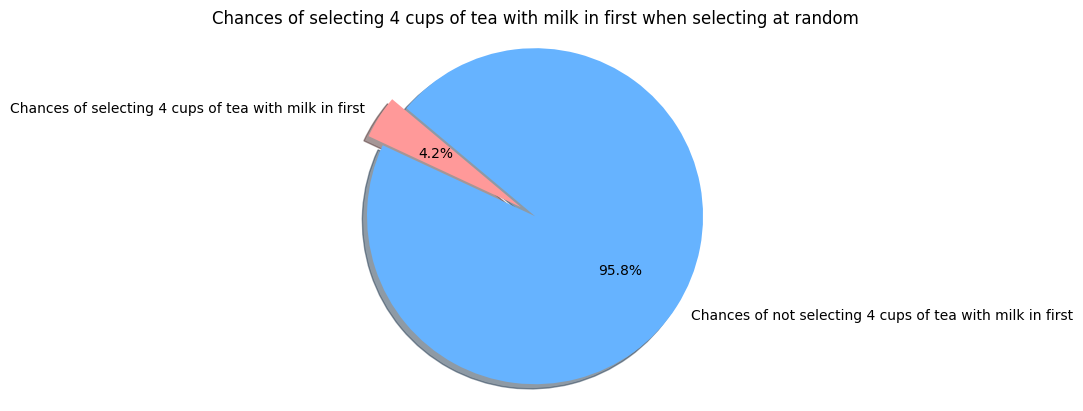

In [10]:
# looking in pie chart for the percent chances of selecting 4 cups of tea with milk in first when selecting at random
# chances of selecting 4 cups of tea with milk in first when selecting at random
chances = no_combs / ways_ordered
print(chances)
chances_percentage = chances * 100
chances_percentage  
labels = ['Chances of selecting 4 cups of tea with milk in first', 'Chances of not selecting 4 cups of tea with milk in first']
sizes = [chances_percentage, 100 - chances_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Chances of selecting 4 cups of tea with milk in first when selecting at random')
plt.show()

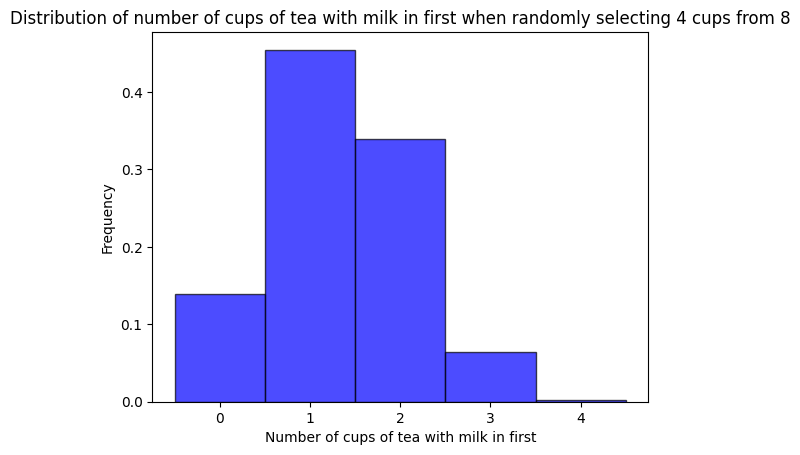

In [11]:
# In a histogram, show the distribution of number of cups of tea with milk in first
# when randomly selecting 4 cups from 12. 
milk_first_counts = []
n_trials = 100000
for _ in range(n_trials):
    selected_cups = random.sample(range(no_cups), no_cups_milk_first)
    milk_first_count = sum(1 for cup in selected_cups if cup < no_cups_milk_first)
    milk_first_counts.append(milk_first_count)
plt.hist(milk_first_counts, bins=np.arange(-0.5, no_cups_milk_first + 1.5, 1), density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xticks(range(no_cups_milk_first + 1))
plt.xlabel('Number of cups of tea with milk in first')
plt.ylabel('Frequency')
plt.title('Distribution of number of cups of tea with milk in first when randomly selecting 4 cups from 8')
plt.show()

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt

### Generate 100,000 samples of size 10

First I'll generate 100,000 samples of size 10 from the standard normal distribution. 

In [13]:
def generate_samples(n_samples, sample_size):
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

n_samples = 100000
sample_size = 10
samples = generate_samples(n_samples, sample_size)

print(samples)

[[ 3.06140924e-01  7.88078724e-01  9.65767515e-01 ... -3.97730198e-05
   1.02320364e-01  1.08048413e-01]
 [ 2.96973813e+00  1.17294677e+00  7.34150730e-01 ...  1.44881823e+00
   1.61063554e+00 -1.26557372e-02]
 [-1.04576486e+00 -2.29912163e+00 -2.53766189e+00 ...  6.81376025e-01
  -6.12410594e-02  2.85293698e-01]
 ...
 [-9.01182788e-01  1.01086872e+00 -3.29113124e-01 ... -1.10893450e+00
  -8.10446653e-01  6.85371513e-01]
 [ 4.13691990e-01 -9.21964918e-03 -1.68684715e-01 ...  1.87511586e-02
  -3.60621760e-01 -1.15140885e+00]
 [-2.02154149e-01 -1.36444935e+00  8.78672752e-02 ...  9.44794513e-01
  -8.20658859e-01  8.29090801e-01]]


### Compute standard deviations

The second step will be compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD).

In [14]:
# Compute sample SD (ddof=1) and population SD (ddof=0)
sample_std = np.std(samples, axis=1, ddof=1)
population_std = np.std(samples, axis=1, ddof=0)

### Plot histograms.

Plot histograms of both sets of values on the same axes with transparency.

Looking at [geeksforgeeks](https://www.geeksforgeeks.org/python/overlapping-histograms-with-matplotlib-in-python/) for information about the plots with transparency bars.

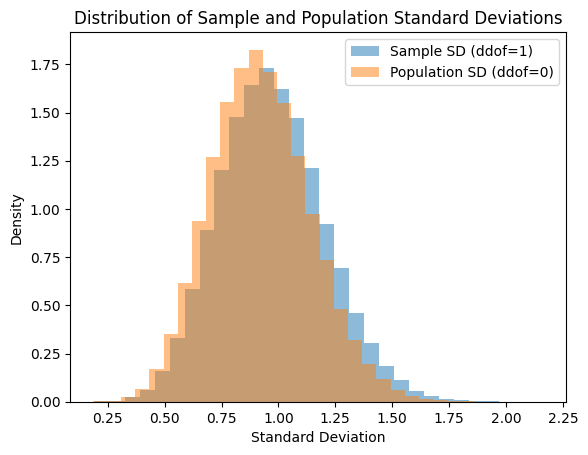

In [15]:
fig, ax = plt.subplots()
ax.hist(sample_std, bins=30, alpha=0.5, label='Sample SD (ddof=1)', density=True)
ax.hist(population_std, bins=30, alpha=0.5, label='Population SD (ddof=0)', density=True)
ax.set_title('Distribution of Sample and Population Standard Deviations')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()

## Problem 3: t-Tests



## Problem 4: ANOVA

## End

*************